In [0]:
#Importing necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [0]:
listings="""SELECT * FROM [mineral-aegis-248102.Project1.listings]"""
dfl = gbq.read_gbq(listings,project_id="mineral-aegis-248102.Project1",dialect="legacy")

In [0]:
calendar="""SELECT * FROM [mineral-aegis-248102.Project1.calendar]"""
dfc = gbq.read_gbq(calendar,project_id="mineral-aegis-248102.Project1",dialect="legacy")
dfc.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [0]:
# Check start and end period to determine the sample of research
dfc.min()

listing_id          3335
date          2016-01-04
available              f
dtype: object

In [0]:
dfc.max()

listing_id      10340165
date          2017-01-02
available              t
dtype: object

Period data start from 2016-01-04 till 2017-01-02. Because of range period data in one year, so we do monthly analysis. We use 12 sample data month, that is Jan - Dec 2016.

In [0]:
#Check whether is there any listing room who has two condition (available and non available) in the same day
dfcek = dfc.groupby(['date','listing_id']).count()
dfcek[dfcek['available']>1]

,,available,price
date,listing_id,,


There is no data listing room that has two condition / two rows in the same day. So that the unique key is listing_id and date.



In [0]:
# check whether there is any change of total quantity listing room in the sample period
dfc.groupby('date').count().head(5)

,listing_id,available,price
date,,,
2016-01-04,3818,3818,1735
2016-01-05,3818,3818,1867
2016-01-06,3818,3818,1826
2016-01-07,3818,3818,1776
2016-01-08,3818,3818,1782


In [0]:
dfc.groupby('date').count().tail(5)


,listing_id,available,price
date,,,
2016-12-29,3818,3818,2835
2016-12-30,3818,3818,2840
2016-12-31,3818,3818,2859
2017-01-01,3818,3818,2922
2017-01-02,3818,3818,2776


In [0]:
dfc.listing_id.nunique()

3818

The listing room has the same quantity on every day. It is proved by count listing_id in the sample date. If we count distinct listing_id for all data, we have the same quantity too. So we can called the total of quantity listing room as control variable


The next step is preparing data for analyze. We take the data which is 'has available' = false. It means the room is booked in that day. We count booking room in a day, and do analyze monthly and weekly. Monthly analysis is analysis for determining what is the date when low season happening. Weekly analysis is analysis for determining what is the day in weekly when low season happening.

In [0]:
#prepare data
dfc['date'] = pd.to_datetime(dfc['date'])
dfc1 = dfc[dfc['available']== 'f']
dfc2 = dfc1.groupby('date')['listing_id'].count().reset_index()
dfc2['date'] = pd.to_datetime(dfc2['date'])
dfc2['Month'] = dfc2['date'].dt.strftime('%b')
dfc2['Day'] = dfc2['date'].dt.day   
dfc2.set_index(['Month','Day']).sum(level=[0,1]).reset_index()
dfc2[dfc2['Month']=='Jan']
dfc2.head()

,date,listing_id,Month,Day
0,2016-01-04,2083,Jan,4
1,2016-01-05,1951,Jan,5
2,2016-01-06,1992,Jan,6
3,2016-01-07,2042,Jan,7
4,2016-01-08,2036,Jan,8


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count listing_id')

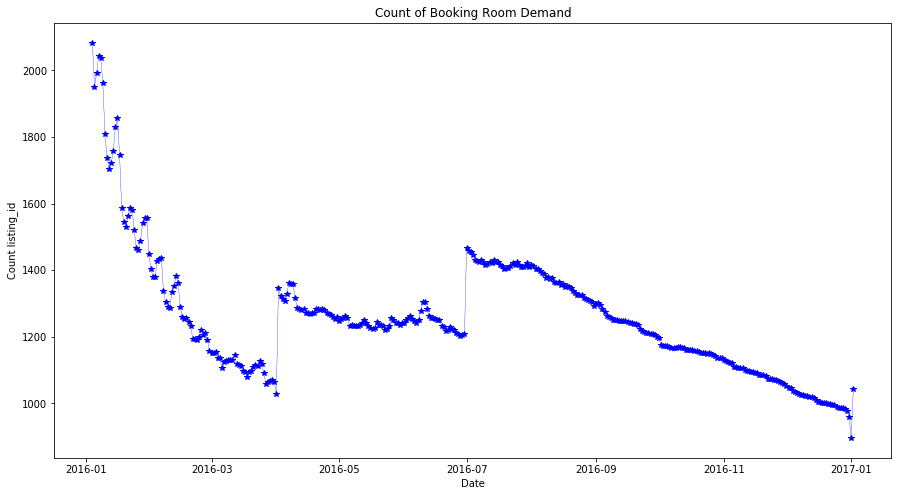

In [0]:
#design a visualization. Make a chart (a whole data to know about the trend of data)
plt.figure(figsize=(15, 8))
plt.plot(dfc2.date, dfc2.listing_id, color='b', marker='*', linewidth=0.3)
plt.title("Count of Booking Room Demand")
plt.xlabel('Date')
plt.ylabel('Count listing_id')

In [0]:
#Prepare data for cluster based on period.
dfc2['date'] = pd.to_datetime(dfc2['date'])
dfc2["weekday"] = dfc2["date"].dt.weekday_name
dfc3 = dfc2[(dfc2['date']>='2016-01-01')&(dfc2['date']<='2016-04-01')]
dfc4 = dfc2[(dfc2['date']>'2016-04-01')&(dfc2['date']<'2016-07-01')]
dfc5 = dfc2[(dfc2['date']>='2016-07-01')&(dfc2['date']<='2017-01-02')]
dfc2.head(5)

,date,listing_id,Month,Day,weekday
0,2016-01-04,2083,Jan,4,Monday
1,2016-01-05,1951,Jan,5,Tuesday
2,2016-01-06,1992,Jan,6,Wednesday
3,2016-01-07,2042,Jan,7,Thursday
4,2016-01-08,2036,Jan,8,Friday


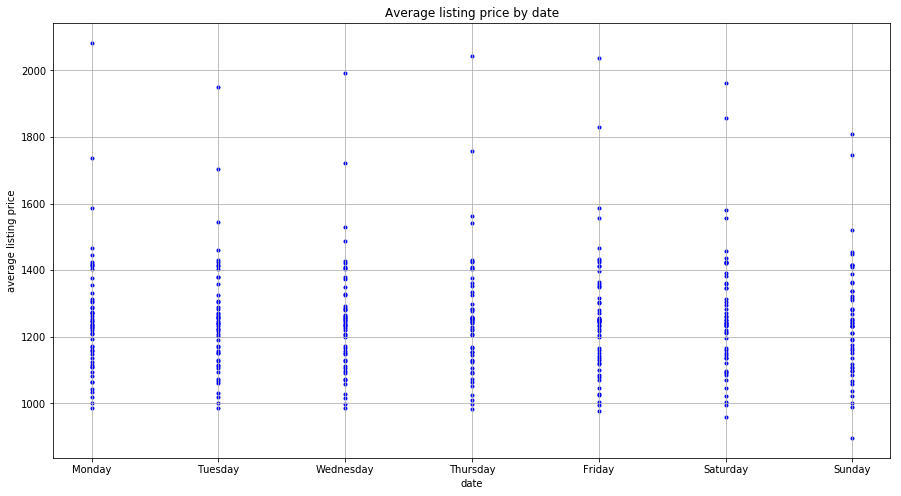

In [0]:
#all data
plt.figure(figsize=(15, 8))
plt.scatter(dfc2.weekday, dfc2.listing_id, color='b', marker='.')
plt.title("Average listing price by date")
plt.xlabel('date')
plt.ylabel('average listing price')
plt.grid()

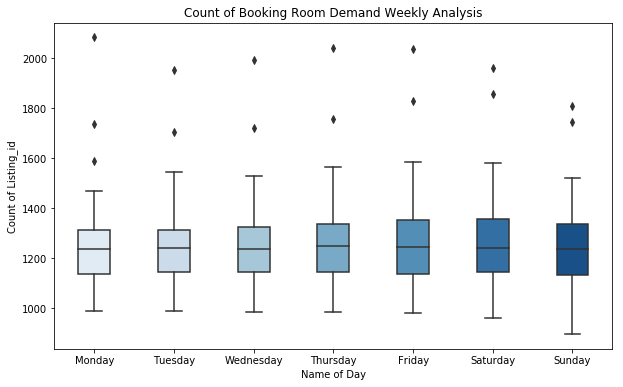

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'weekday',  y = 'listing_id', data = dfc2, palette="Blues", width=0.4)
plt.title("Count of Booking Room Demand Weekly Analysis")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

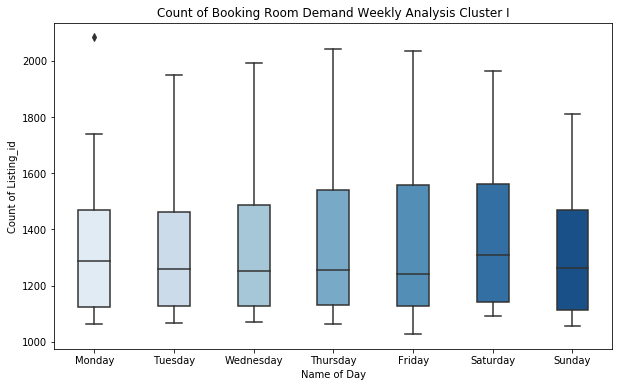

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'weekday',  y = 'listing_id', data = dfc3, palette="Blues", width=0.4)
plt.title("Count of Booking Room Demand Weekly Analysis Cluster I")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

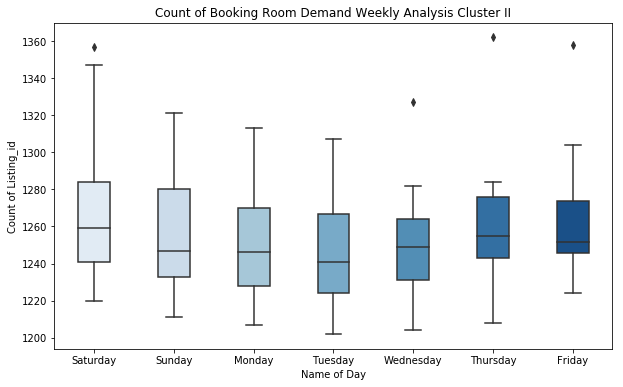

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'weekday',  y = 'listing_id', data = dfc4, palette="Blues", width=0.4)
plt.title("Count of Booking Room Demand Weekly Analysis Cluster II")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

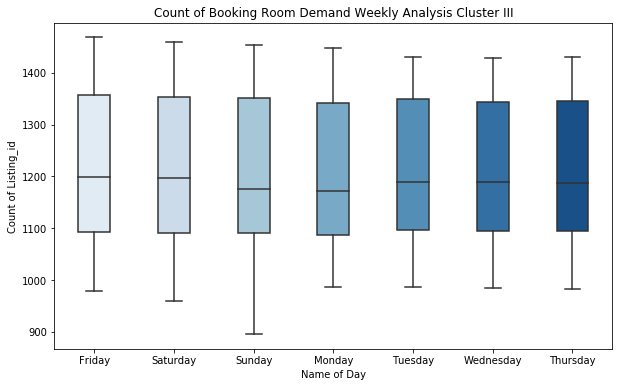

In [0]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'weekday',  y = 'listing_id', data = dfc5, palette="Blues", width=0.4)
plt.title("Count of Booking Room Demand Weekly Analysis Cluster III")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

When we look each of chart, there is not enough to determine the low season in each cluster. If we combine them, we take all data (the first boxplot), it is easier to find low demand. The low demand is found on Wednesday.

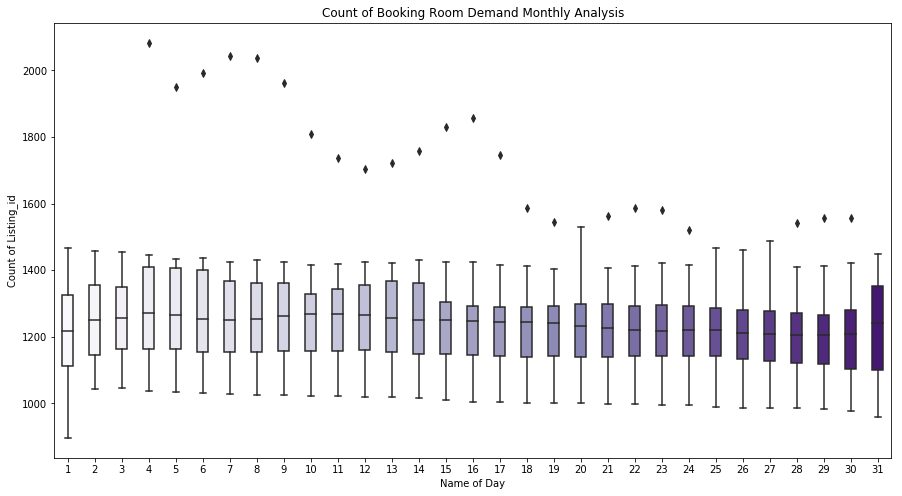

In [0]:
# Montlhy analysis
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Day',  y = 'listing_id', data = dfc2, palette="Purples", width=0.4)
plt.title("Count of Booking Room Demand Monthly Analysis")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

There are lot anomamlies present in the data. We can filter it, to analyze deeper and look the chart more detail.

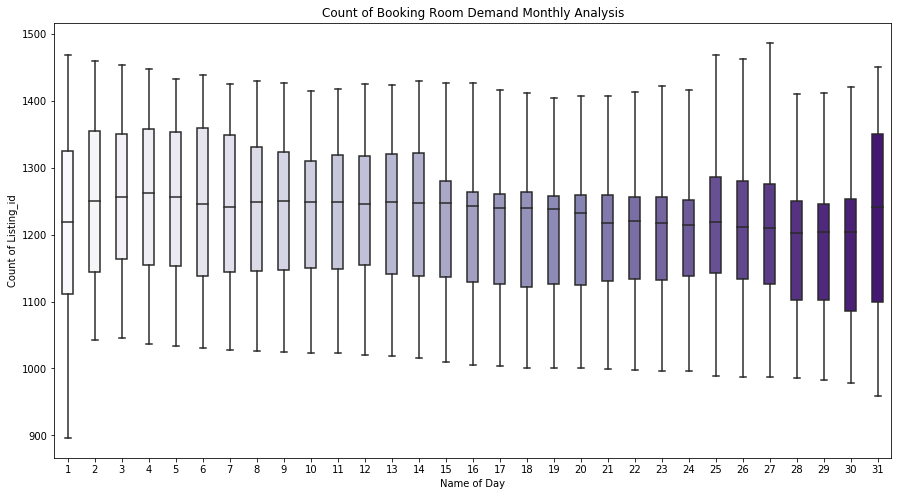

In [0]:
dfc7 = dfc2[dfc2['listing_id']<1500]
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Day',  y = 'listing_id', data = dfc7, palette="Purples", width=0.4)
plt.title("Count of Booking Room Demand Monthly Analysis")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

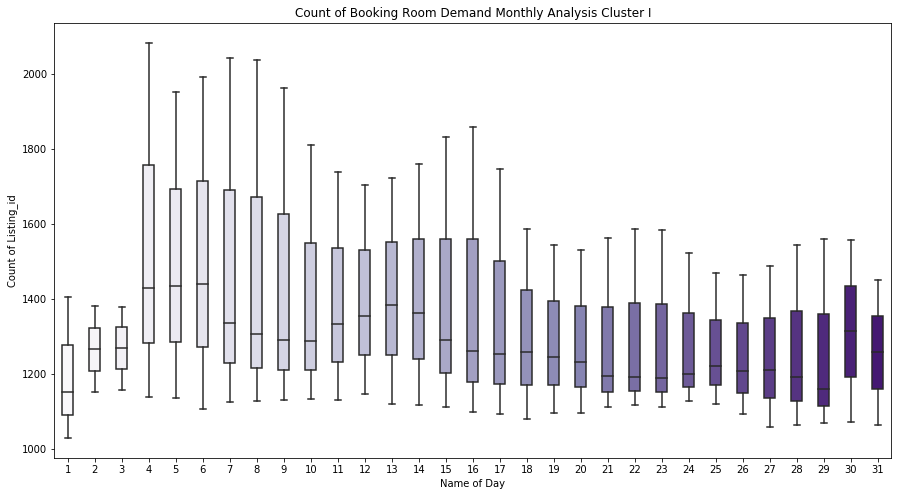

In [0]:
#cluster I
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Day',  y = 'listing_id', data = dfc3, palette="Purples", width=0.4)
plt.title("Count of Booking Room Demand Monthly Analysis Cluster I")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

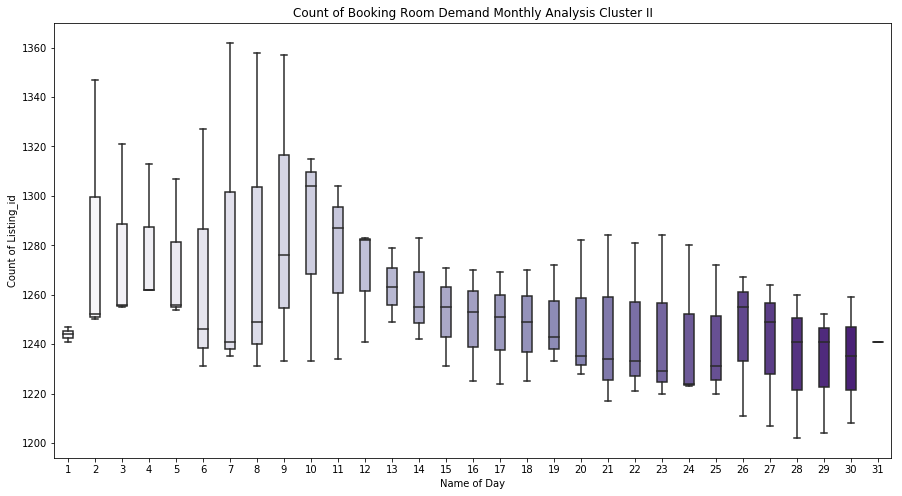

In [0]:
#Cluster II
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Day',  y = 'listing_id', data = dfc4, palette="Purples", width=0.4)
plt.title("Count of Booking Room Demand Monthly Analysis Cluster II")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

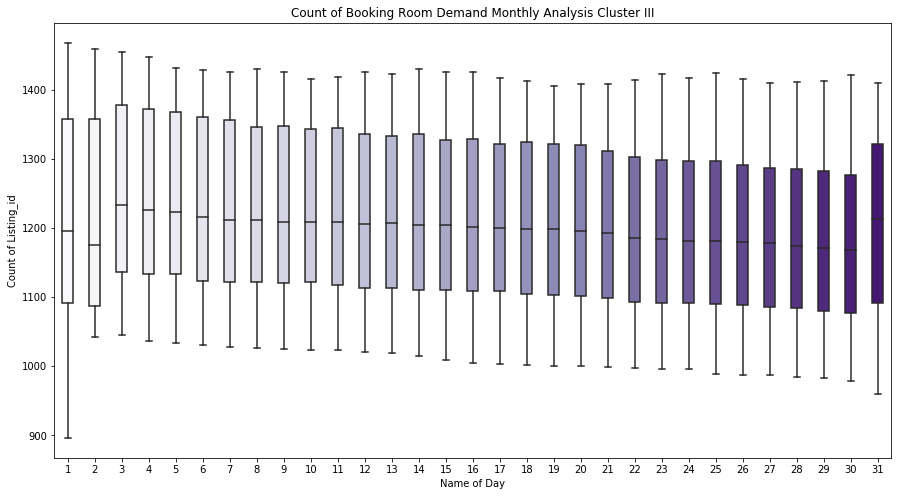

In [0]:
dfc7 = dfc2[dfc2['listing_id']<1500]
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'Day',  y = 'listing_id', data = dfc5, palette="Purples", width=0.4)
plt.title("Count of Booking Room Demand Monthly Analysis Cluster III")
plt.xlabel('Name of Day')
plt.ylabel('Count of Listing_id')
plt.show()

When we look each of chart, there is not enough to determine the low season in each cluster. If we combine them, we take all data (the first boxplot), it is easier to find low demand. The low demand is found on the range date 16 - 24 of each month.

In [0]:
dfl.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3818,3.818000e+03,3818,3818,3641,3249,3818,3818,2786,2212,2884,3498,3498,3818,3498,3.818000e+03,3818,3816,3816,3810,2959,3295,3295,3045,3816,3816,3816,3518,3816.000000,3816.000000,3818,3816,3816,3818,3402,3818,3818,3818,3818,...,3812.000000,3817.000000,3818,3818,97.000000,3818,2009,1517,1866,2788,3818.000000,3818,3818.000000,3818.000000,3818,3818,3818.000000,3818.000000,3818.000000,3818.000000,3818,3818.000000,3191,3191,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818,0.0,3818,3818,3818,3818,3818,3818.000000,3191.000000
unique,NaN,3818,NaN,1,3792,3478,3119,3742,1,2506,1999,2574,3498,3498,3818,3498,NaN,2751,1466,1380,120,2011,4,45,2,2,2743,2743,102,NaN,NaN,116,2,2,1442,81,87,17,7,2,...,NaN,NaN,5,3284,NaN,273,395,356,46,118,NaN,45,NaN,NaN,34,1,NaN,NaN,NaN,NaN,1,NaN,984,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,2,3,2,2,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/1200829,NaN,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,https://a0.muscache.com/ac/pictures/26323285/f...,https://a0.muscache.com/im/pictures/99360382/7...,https://a1.muscache.com/ac/pictures/1708958/32...,https://a1.muscache.com/ac/pictures/17085682/a...,NaN,https://www.airbnb.com/users/show/8534462,Andrew,2013-08-30,"Seattle, Washington, United States",It would be my pleasure to share and explore t...,within an hour,100%,100%,f,https://a2.muscache.com/ac/pictures/a4d7d053-c...,https://a2.muscache.com/ac/pictures/a4d7d053-c...,Capitol Hill,NaN,NaN,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,...,NaN,NaN,Real Bed,{},NaN,$150.00,$500.00,"$2,500.00",$100.00,$50.00,NaN,$0.00,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2016-01-04,NaN,2015-09-21,2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,NaN,NaN
freq,NaN,1,NaN,3818,3,15,14,10,3818,17,39,32,1,1,1,1,NaN,46,56,51,3259,46,1692,2371,3044,3038,46,46,405,NaN,NaN,595,3809,2997,30,351,397,794,3810,3817,...,NaN,NaN,3657,45,NaN,162,94,66,348,310,NaN,2048,NaN,NaN,706,3818,NaN,NaN,NaN,NaN,3818,NaN,25,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3818,NaN,3818,3227,1417,3497,3443,NaN,NaN
mean,5.550111e+06,NaN,2.016010e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.578556e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.157757,7.157757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.307712,1.735394,NaN,NaN,854.618557,NaN,NaN,NaN,NaN,NaN,1.67260

In [0]:
dfl.isnull().sum()[dfl.isnull().sum().nonzero()[0]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


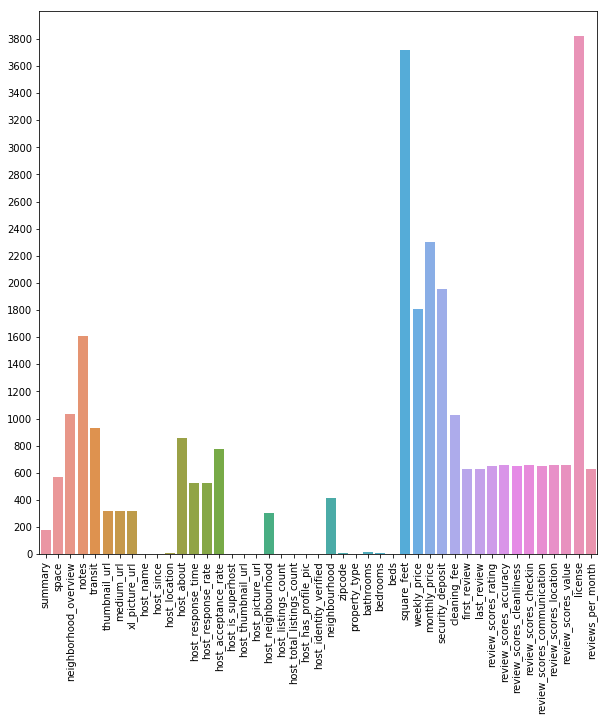

In [0]:
# Plotting count of null values
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,4000,200))
sns.barplot(x=dfl.isnull().sum()[dfl.isnull().sum().nonzero()[0]].index,y=dfl.isnull().sum()[dfl.isnull().sum().nonzero()[0]].values)

In [0]:
dfl['monthly_price'] = pd.to_numeric(dfl['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
dfl['price'] = pd.to_numeric(dfl['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
dfl['weekly_price'] = pd.to_numeric(dfl['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
dfl['security_deposit'] = pd.to_numeric(dfl['security_deposit'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
dfl['cleaning_fee'] = pd.to_numeric(dfl['cleaning_fee'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
dfl['extra_people'] = pd.to_numeric(dfl['extra_people'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')
dfl['host_response_rate'] = pd.to_numeric(dfl['host_response_rate'].apply(lambda x: str(x).replace('%', ''))
                                        ,errors='coerce')

In [0]:
dfl['host_since']=pd.to_datetime(dfl['host_since'])
dfl['month']=dfl.host_since.dt.month
dfl['year']=dfl.host_since.dt.year


In [0]:
dfl=dfl.rename(columns={'id':'listing_id'})

In [0]:
dcl=dfl.merge(dfc,on='listing_id')

In [0]:
dfc['date']=pd.to_datetime(dfc['date'])
dfc['month']=dfc.date.dt.month
dfc['year']=dfc.date.dt.year

In [0]:
dfc['price'] = pd.to_numeric(dfc['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')

In [0]:
dfl2=dfl._get_numeric_data()
dfl2.head()

,listing_id,scrape_id,host_id,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,month,year
0,241032,20160104002432,956883,96.0,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,1.0,NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07,8.0,2011.0
1,953595,20160104002432,5177328,98.0,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48,2.0,2013.0
2,3308979,20160104002432,16708587,67.0,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,7.0,NaN,975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15,6.0,2014.0
3,7421966,20160104002432,9851441,NaN,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,2.0,NaN,100.0,650.0,2300.0,NaN,NaN,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,11.0,2013.0
4,278830,20160104002432,1452570,100.0,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,3.0,NaN,450.0,NaN,NaN,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89,11.0,2011.0


(array([1.339e+03, 1.600e+03, 4.520e+02, 2.180e+02, 7.500e+01, 7.200e+01,
        2.400e+01, 1.200e+01, 1.200e+01, 1.000e+00, 4.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 4.000e+00]),
 array([  20.        ,   85.33333333,  150.66666667,  216.        ,
         281.33333333,  346.66666667,  412.        ,  477.33333333,
         542.66666667,  608.        ,  673.33333333,  738.66666667,
         804.        ,  869.33333333,  934.66666667, 1000.        ]),
 <a list of 15 Patch objects>)

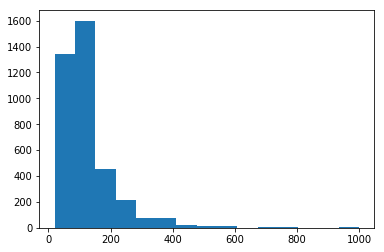

In [0]:
#Plotting price against listings
plt.hist(dfl['price'],bins=15)

We see that maximum no of listings are in price range from 0-200 dollars.

In [0]:
# counting the total number of listing by location in Seattle city
dfl['neighbourhood_cleansed'].value_counts().head(15)

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Name: neighbourhood_cleansed, dtype: int64

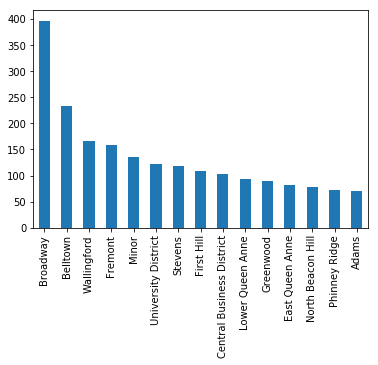

In [0]:
dfl['neighbourhood_cleansed'].value_counts().head(15).plot(kind='bar')

In [0]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [0]:
len(dfl2['latitude'])

3818

In [0]:
m = folium.Map(location=[47.60, -122.24], zoom_start = 11)
heat_data = [[row['latitude'],row['longitude']] for index, row in dfl2[['latitude', 'longitude']].iterrows()]
hh =  HeatMap(heat_data).add_to(m)
m

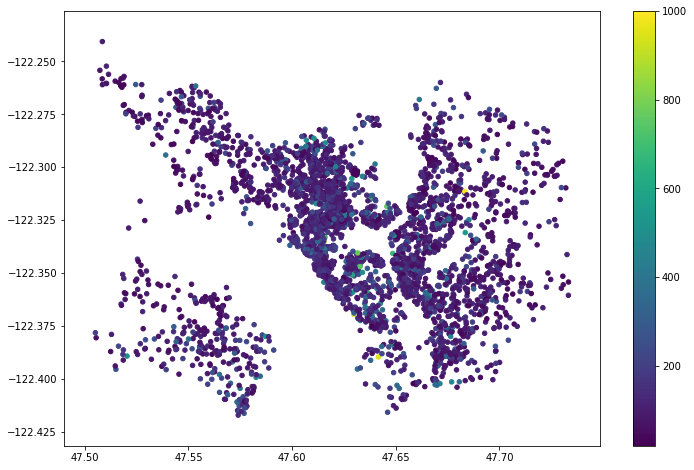

In [0]:
plt.figure(figsize=(12,8))
points = plt.scatter(dfl2['latitude'], dfl2['longitude'], c=dfl["price"], s=20, cmap="viridis") 
plt.colorbar(points)

The max no of listings having prices higher than 200 are certainly more in the center of City.

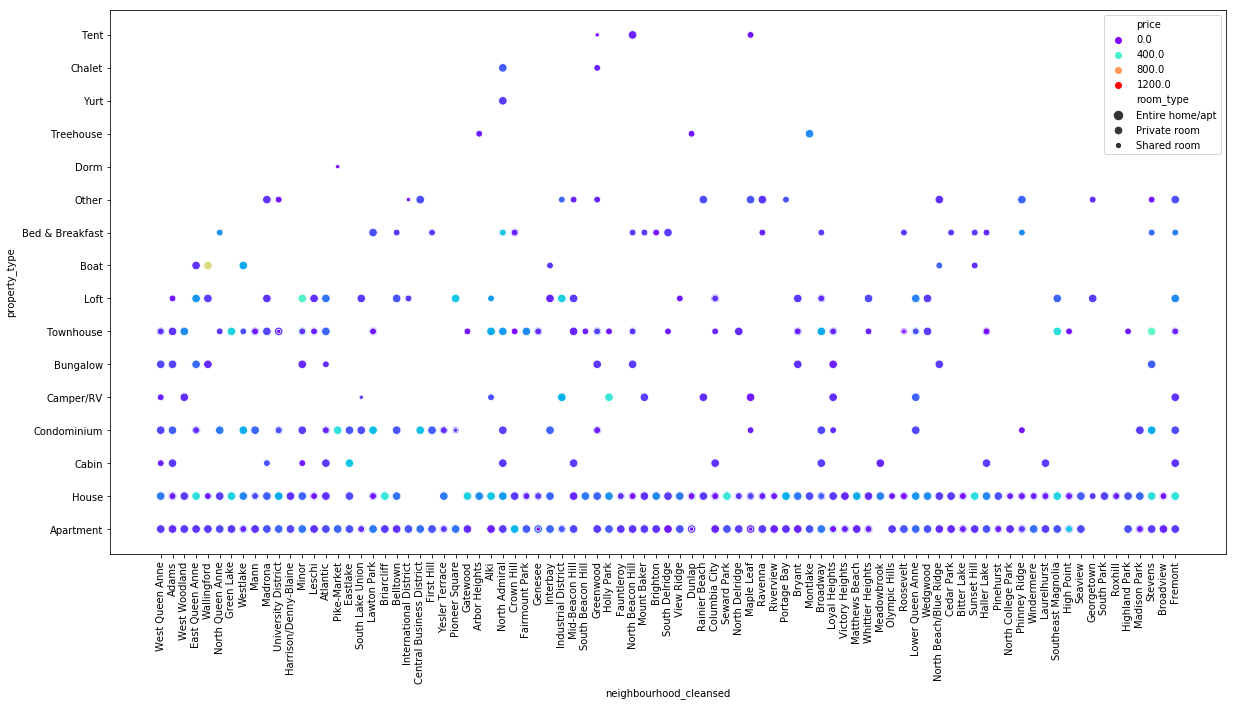

In [0]:
#Plotting Neighbourhood with price, room type ,property type to draw any possible conculsion
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.scatterplot(x='neighbourhood_cleansed',hue='price',size='room_type',y='property_type',palette='rainbow',data=dfl)

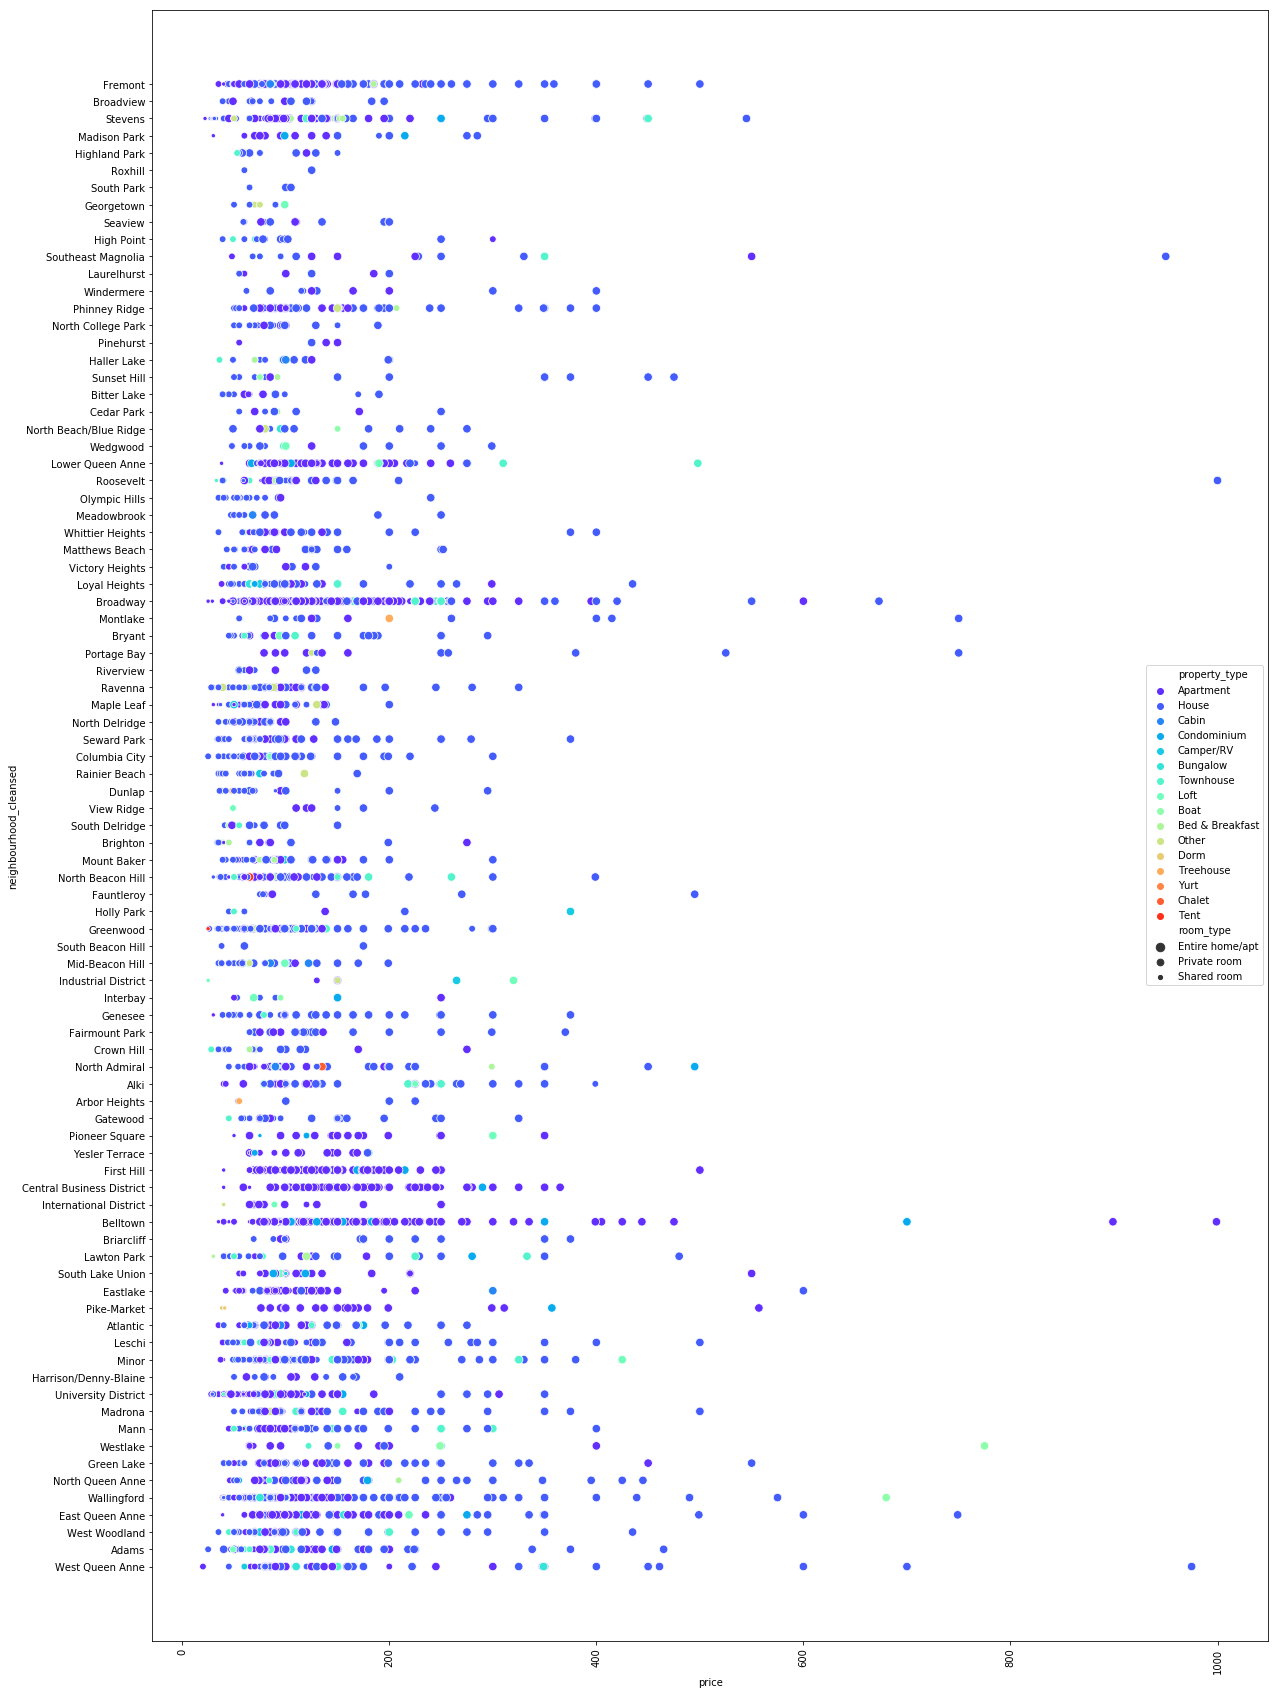

In [0]:
plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
sns.scatterplot(y='neighbourhood_cleansed',x='price',size='room_type',hue='property_type',palette='rainbow',data=dfl)

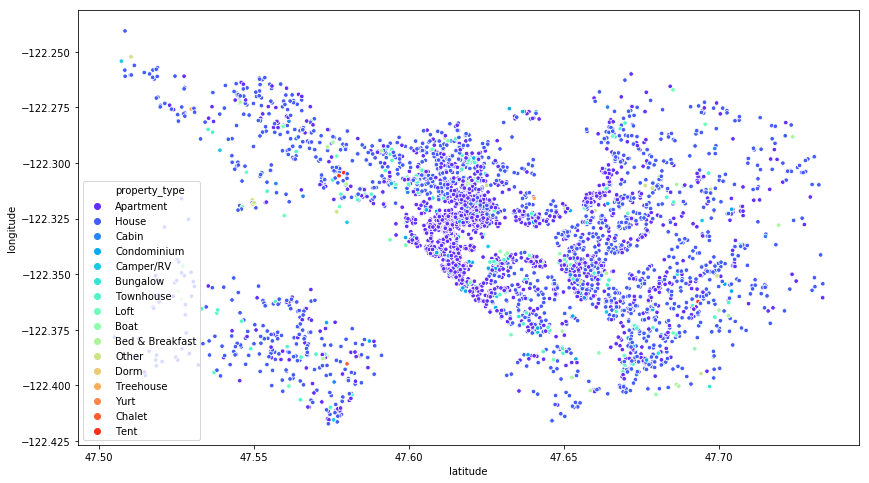

In [0]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=dfl2['latitude'], y=dfl2['longitude'], hue=dfl["property_type"], s=20, palette="rainbow") 

1) Maximum no of Apartment,House are alloted as a whole .
2) Price range is between 0-200 inmost of the places. 
3) Distribution of Listings like Bunglow,Townhouse,Loft is mostly more inratio at outskirts of city where possible tourist places .
But city center is predominatly apartments and houses.


In [0]:
#Analyzing host response time
dfl['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

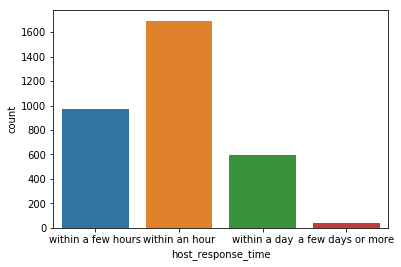

In [0]:
sns.countplot(dfl['host_response_time'])

Maximum hosts respond within an hour.

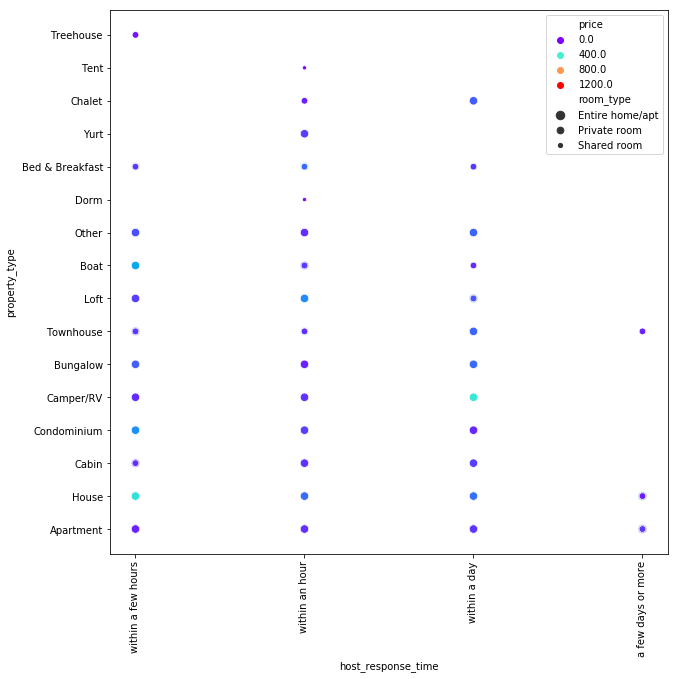

In [0]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_time',hue='price',size='room_type',y='property_type',palette='rainbow',data=dfl)

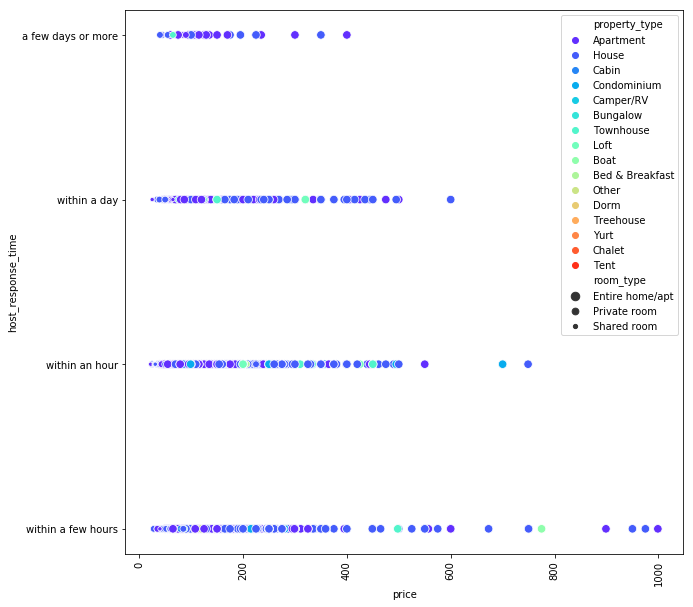

In [0]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(y='host_response_time',x='price',size='room_type',hue='property_type',palette='rainbow',data=dfl)

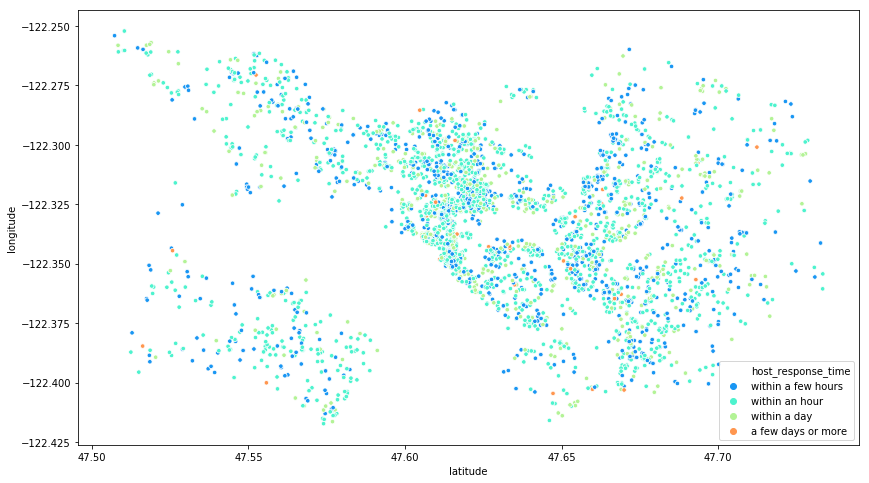

In [0]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=dfl2['latitude'], y=dfl2['longitude'], hue=dfl["host_response_time"], s=20, palette="rainbow")



> We see that response time varies a bit on the basis of property type .
But there no possible pattern with there variance with price or property type so this might mean that
host response time is highly individual basis.
However we see that usually it takes within an hour in city center.
And within few days in outskirts of city.
This might mean with business planning which should be more planned in city center

---





In [0]:
dfl['host_location'].value_counts().head(20)

Seattle, Washington, United States                             3259
US                                                              246
Spokane, Washington, United States                               41
Kent, Washington, United States                                  34
Los Angeles, California, United States                           13
Bellevue, Washington, United States                              12
San Francisco, California, United States                         11
Mercer Island, Washington, United States                         10
Kirkland, Washington, United States                               8
New York, New York, United States                                 6
Seattle                                                           5
Shoreline, Washington, United States                              5
Sammamish, Washington, United States                              5
Vashon, Washington, United States                                 5
Tucson, Arizona, United States                  

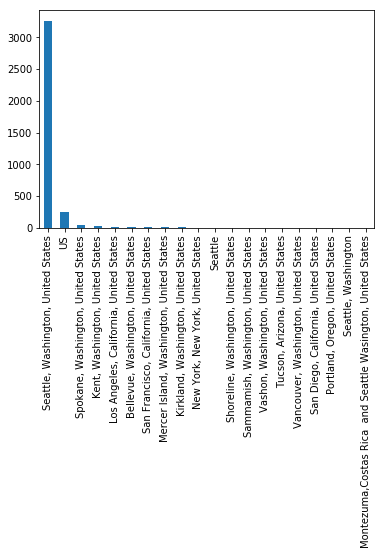

In [0]:
dfl['host_location'].value_counts().head(20).plot(kind='bar')

Most of the host locations are in Seattle and other hosts are mostly from nearby places Washington And California.

In [0]:
dfl['host_response_rate'].value_counts()

100.0    2371
90.0      165
80.0      104
99.0       78
88.0       66
50.0       52
94.0       46
67.0       41
75.0       32
89.0       32
86.0       30
98.0       28
96.0       28
70.0       25
97.0       21
60.0       20
83.0       20
92.0       18
93.0       18
33.0       14
40.0       12
63.0       11
71.0        8
95.0        8
78.0        8
91.0        5
43.0        4
76.0        3
25.0        3
64.0        3
87.0        3
17.0        2
82.0        2
57.0        2
58.0        2
31.0        1
55.0        1
81.0        1
56.0        1
53.0        1
38.0        1
30.0        1
68.0        1
69.0        1
65.0        1
Name: host_response_rate, dtype: int64

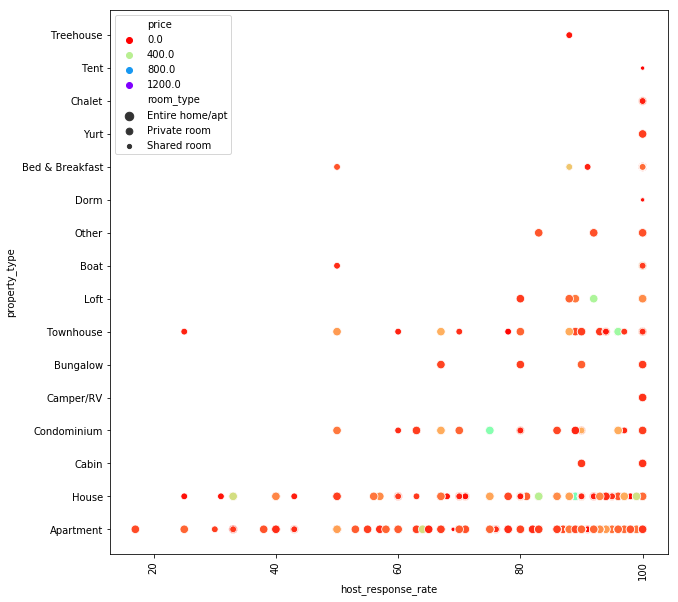

In [0]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.scatterplot(x='host_response_rate',hue='price',size='room_type',y='property_type',palette='rainbow_r',data=dfl)

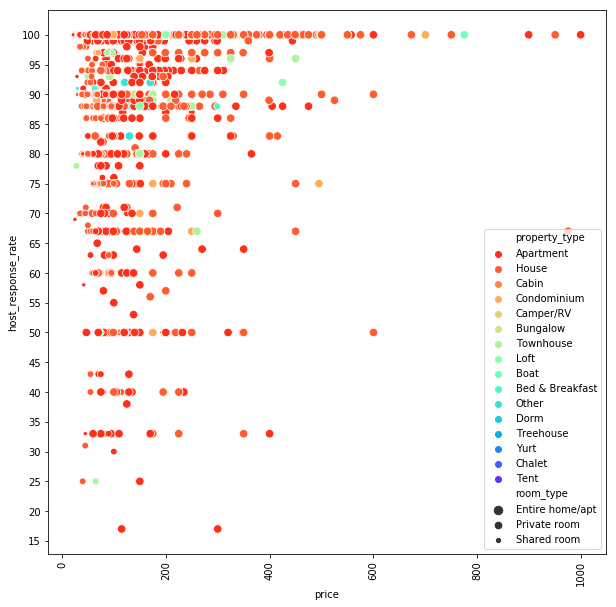

In [0]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,105,5))
sns.scatterplot(y='host_response_rate',x='price',size='room_type',hue='property_type',palette='rainbow_r',data=dfl)

The Host Response rate is mostly 100 % for 90% of the listings.
House and Apartments have response rate of around 100 % .
While distribution of Loft,Boat,Bunglow,Townhouse is mostly between 90 - 95 %

In [0]:
# Plotting number of proprty type and room type
dfl['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

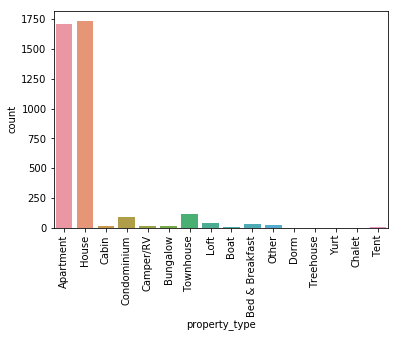

In [0]:
plt.xticks(rotation=90)
sns.countplot(dfl['property_type'])

In [0]:
dfl['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

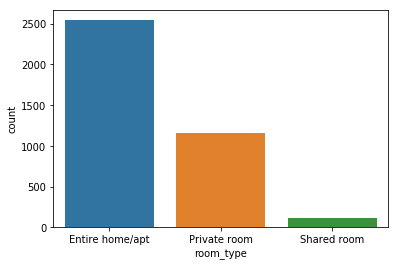

In [0]:
sns.countplot(dfl['room_type'])

 Maximum no of properties are Apartments and houses followed by sighnifigantly low Townhouse and Condominium . This also show the type of property in Seattle City.
 
Maximim no of listings are for Entire Rooms / Apartments.

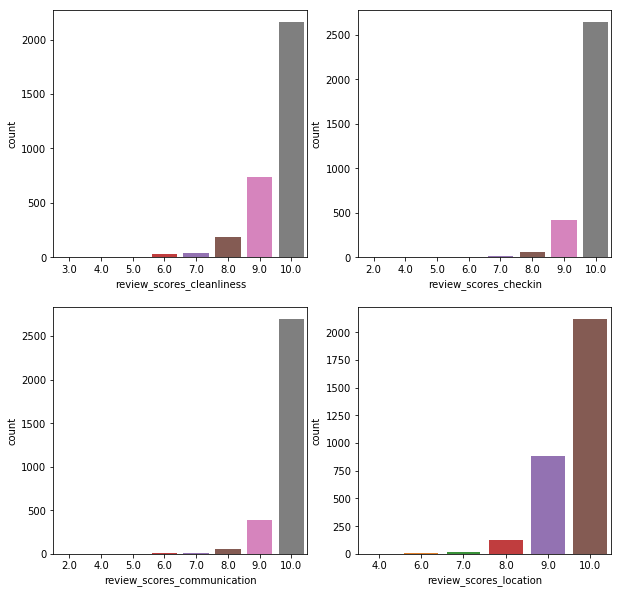

In [0]:
# Analysing Review's of listing
fig,axes= plt.subplots(nrows=2, ncols= 2,figsize=(10,10))
sns.countplot(dfl['review_scores_cleanliness'],ax=axes[0][0])
sns.countplot(dfl['review_scores_checkin'],ax=axes[0][1])
sns.countplot(dfl['review_scores_communication'],ax=axes[1][0])
sns.countplot(dfl['review_scores_location'],ax=axes[1][1])

Most of the reviews are in between 9 -10 which means that selecting a listing with review scores less than 9 is not good.

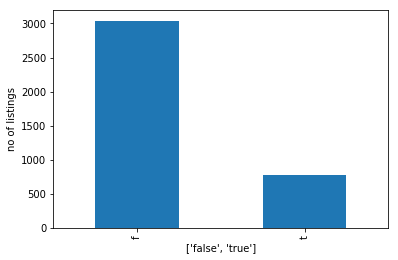

In [0]:
# Superhost features and counting no of listings which are superhosts

plt.xlabel(['false','true'])
plt.ylabel('no of listings')
dfl['host_is_superhost'].value_counts().plot(kind='bar')

Very few listings are superhost aroung 17% this would mean that it's not so easier to get this title from AirBnB.


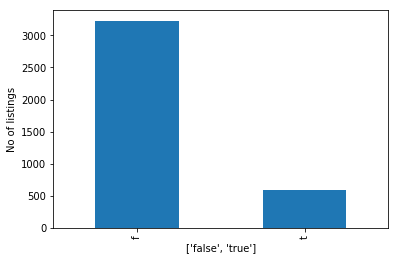

In [0]:
# Whether a listing is instant bookable or not

plt.xlabel(['false','true'])
plt.ylabel('No of listings')
dfl['instant_bookable'].value_counts().plot(kind='bar')

We see very few listings are instantly bookable around 16% of the total.

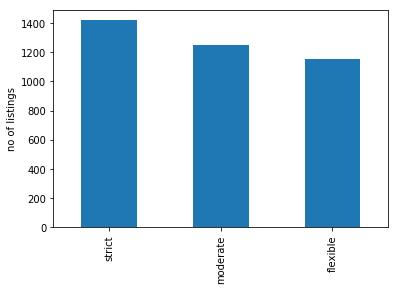

In [0]:
# Cancellation policy of listings
plt.ylabel('no of listings')
dfl['cancellation_policy'].value_counts().plot(kind='bar')

Cancellation property is usually equally distributed in strict ,moderate and flexible with a gap of 200.

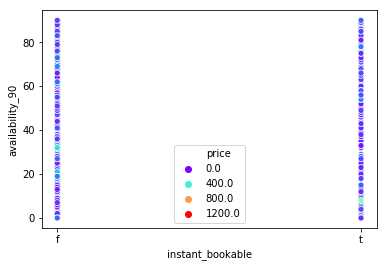

In [0]:
sns.scatterplot(hue=dfl['price'],x=dfl['instant_bookable'],y=dfl['availability_90'],palette='rainbow')

Availability is not affected by instant booking policy as we see similiar disrtribution of availability with instant booking policy and price.
So this might be the reason why so few listings offer this feature.

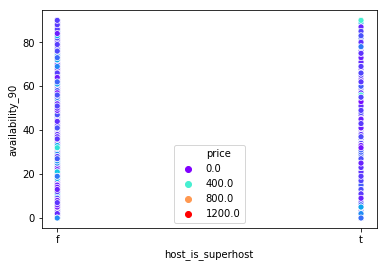

In [0]:
sns.scatterplot(hue=dfl['price'],x=dfl['host_is_superhost'],y=dfl['availability_90'],palette='rainbow')

Though we see that availability is affected in negative by superhost feature usually listings with higher prices are less available when it is a superhost.